   from to  weight
0     A  D       1
1     B  A       2
2     C  E       3
3     A  C       4
4     E  A       5
5     F  D       1
6     E  G       2
7     G  D       3
8     G  B       4
9     D  G       5
10    F  C       6


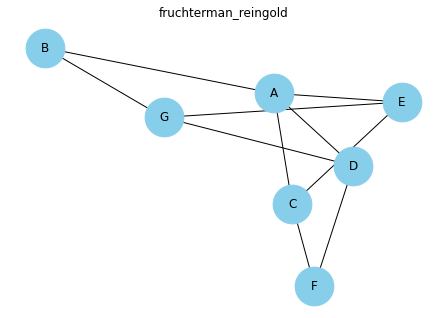

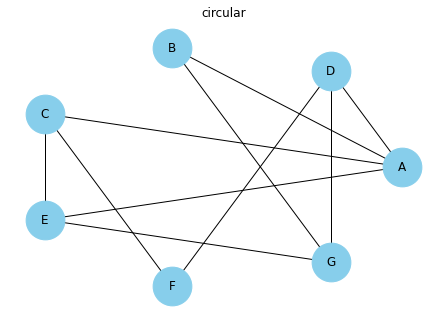

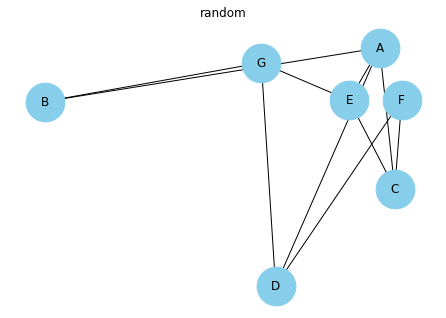

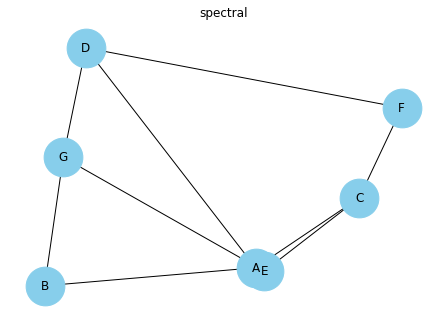

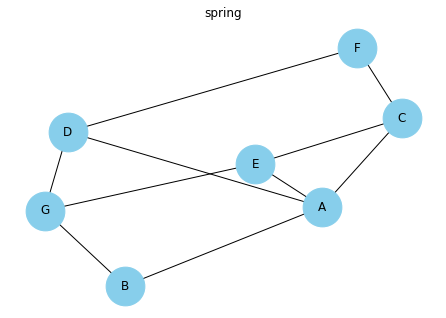

In [12]:
# libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas as pd
import psycopg2

%matplotlib inline

db_host = "192.168.86.31"
db_chem = psycopg2.connect(host = db_host, dbname="Chemistry", user="postgres", password="postgres")
 
# Build a dataframe with your connections
df = pd.DataFrame({ 'from':['A', 'B', 'C','A','E','F','E','G','G','D','F'], 
                   'to':['D', 'A', 'E','C','A','D','G','D','B','G','C'], 
                   'weight':[1,2,3,4,5,1,2,3,4,5,6]})
print(df)
 
# Build your graph
G=nx.from_pandas_edgelist(df, 'from', 'to', 'weight')
 
# Fruchterman Reingold
nx.draw(G, with_labels=True, node_size=1500, node_color="skyblue", pos=nx.fruchterman_reingold_layout(G))
plt.title("fruchterman_reingold")
plt.show()
 
# Circular
nx.draw(G, with_labels=True, node_size=1500, node_color="skyblue", pos=nx.circular_layout(G))
plt.title("circular")
plt.show()
 
# Random
nx.draw(G, with_labels=True, node_size=1500, node_color="skyblue", pos=nx.random_layout(G))
plt.title("random")
plt.show()
 
# Spectral
nx.draw(G, with_labels=True, node_size=1500, node_color="skyblue", pos=nx.spectral_layout(G))
plt.title("spectral")
plt.show()
 
# Spring
nx.draw(G, with_labels=True, node_size=1500, node_color="skyblue", pos=nx.spring_layout(G))
plt.title("spring")
plt.show()

In [3]:
print(df)


   from to  weight
0     A  D       1
1     B  A       2
2     C  E       3
3     A  C       4
4     E  A       5
5     F  D       1
6     E  G       2
7     G  D       3
8     G  B       4
9     D  G       5
10    F  C       6


In [4]:
print(G.nodes)


['A', 'D', 'B', 'C', 'E', 'F', 'G']


In [5]:
H = nx.gnm_random_graph(10,50)
print(H.nodes)
print(H.edges)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)]


In [10]:
# return a dictionary of positions keyed by node
pos_3D = nx.spring_layout(H,dim=3)
print(pos_3D)
# convert to list of positions (each is a list)
xyz = [list(pos_3D[i]) for i in pos_3D]
print(xyz)

{0: array([-0.09027713,  0.74750262,  0.68488162]), 1: array([-0.23986057, -0.46387055, -0.88739105]), 2: array([-0.3739064 , -0.29890964,  0.93034148]), 3: array([-0.84999296,  0.60921052, -0.08526872]), 4: array([ 0.70060771,  0.73324287, -0.05129764]), 5: array([-0.04224201,  0.62605109, -0.83700868]), 6: array([-0.89607788, -0.48449676, -0.02778307]), 7: array([ 0.85358444, -0.30573462, -0.53031659]), 8: array([ 0.17231781, -1.        ,  0.1197927 ]), 9: array([ 0.765847  , -0.16299553,  0.68404996])}
[[-0.09027713300770097, 0.747502624953587, 0.6848816190671954], [-0.2398605712347878, -0.4638705509671871, -0.8873910484820766], [-0.3739064044006759, -0.2989096376796377, 0.9303414768166905], [-0.8499929627885283, 0.6092105179677033, -0.08526872482156671], [0.7006077125624882, 0.7332428650118875, -0.05129764106157999], [-0.04224200527560061, 0.6260510907062502, -0.8370086768262233], [-0.8960778836274298, -0.48449676369183864, -0.027783069289496063], [0.8535844367994303, -0.3057346199

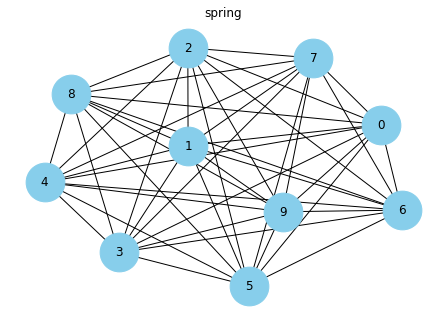

In [7]:
nx.draw(H, with_labels=True, node_size=1500, node_color="skyblue", pos=nx.spring_layout(H))
plt.title("spring")
plt.show()

In [43]:
# Build a dataframe with your connections
df2 = pd.DataFrame({ 'from':['A', 'B', 'C','A','E','F','E','G','G','D','F','J','K','H','L','H', 'L'], 
                   'to':['D', 'A', 'E','C','A','D','G','D','B','L','C','A','C','K','H','B','J'], 
                   'weight':[1,2,3,4,5,1,2,3,4,5,6,2,4,8,2,3,4]})
#print(df2)

sql = 'SELECT * FROM public.tanimoto ORDER BY tanimoto LIMIT 1000'
cur = db_chem.cursor()
cur.execute(sql)
tani = cur.fetchall()
print(type(tani))
tani_df = pd.DataFrame(tani, columns = ['from', 'to', 'weight'])
print(tani_df)
df2 = tani_df

#H = nx.gnm_random_graph(30,50)
#H=nx.from_pandas_edgelist(df2, 'from', 'to', 'weight')
H=nx.from_pandas_edgelist(df2, 'from', 'to', 'weight')
#%matplotlib qt
print(H)

# return a dictionary of positions keyed by node
spring_3D = nx.spring_layout(H,dim=3, iterations=100)
print(spring_3D)
Num_nodes = len(spring_3D)
print(Num_nodes)
#for i in spring_3D:
#    print(i, spring_3D[i][0])

#we need to seperate the X,Y,Z coordinates for Plotly
x_nodes = [spring_3D[i][0] for i in spring_3D] #range(Num_nodes)]# x-coordinates of nodes
y_nodes = [spring_3D[i][1] for i in spring_3D] #range(Num_nodes)]# y-coordinates
z_nodes = [spring_3D[i][2] for i in spring_3D] #range(Num_nodes)]# z-coordinates
t_node = [i for i in spring_3D]
c_node = [1,0,1,0,1,0,1,0,1,0,1]

edge_list = H.edges()
print(edge_list)
print(df2)

#we  need to create lists that contain the starting and ending coordinates of each edge.
x_edges=[]
y_edges=[]
z_edges=[]

#need to fill these with all of the coordiates
for edge in edge_list:
    #format: [beginning,ending,None]
    x_coords = [spring_3D[edge[0]][0],spring_3D[edge[1]][0],None]
    x_edges.append(x_coords)
    #print(x_coords)

    y_coords = [spring_3D[edge[0]][1],spring_3D[edge[1]][1],None]
    y_edges.append(y_coords)

    z_coords = [spring_3D[edge[0]][2],spring_3D[edge[1]][2],None]
    z_edges.append(z_coords)
    
c_edge = df2['weight'].values.tolist()
a_edge = df2[['from','to']].values.tolist()
b_edge = df2[['to','from']].values.tolist()
#print(c_edge)
#print(a_edge)
#print(b_edge)
w_edge = []

for edge in edge_list:
    q = [edge[0],edge[1]]
    if q in a_edge:
        i = a_edge.index(q)
    else:
        i = b_edge.index(q)
    #print(q, i)
    w_edge.append(c_edge[i])
    
print('Edge Weights : ',w_edge)

#print(x_edges)
#print(y_edges)
#print(z_edges)
    
#create traces for the edges
trace_edges ={}
for i in range(0, len(x_edges)):    
    trace_edges['edge_'+str(i)] = go.Scatter3d(x=x_edges[i],
                        y=y_edges[i],
                        z=z_edges[i],
                        mode='lines',
                        line=dict(color='black', width = w_edge[i]),
                        hoverinfo='none')

#create a trace for the nodes
trace_nodes = go.Scatter3d(x=x_nodes,
                         y=y_nodes,
                        z=z_nodes,
                        mode='markers',
                        marker=dict(#symbol='circle',
                                    size=5,
                                    #sizemode = 'diameter', sizeref = .2,
                                    #color=c_node, #color the nodes according to their community
                                    #colorscale=['lightgreen','magenta'], #either green or mageneta
                                    color = 'lightgreen',
                                    line=dict(color='black', width=1)),
                        text= t_node, #textposition = 'middle center', textfont=dict(size=18, family ="Arial"),
                        hoverinfo='text')

#we need to set the axis for the plot 
axis = dict(showbackground=False,
            showline=False,
            zeroline=False,
            showgrid=False,
            showticklabels=False,
            title='')

#also need to create the layout for our plot
layout = go.Layout(#title="Test 3D-graphs",
                width=800,
                height=800,
                showlegend=False,
                scene=dict(xaxis=dict(axis),
                        yaxis=dict(axis),
                        zaxis=dict(axis),
                        ),
                margin=dict(t=100),
                hovermode='closest')

<class 'list'>
     from    to    weight
0      49    88  0.082192
1      46    49  0.122222
2      17    68  0.125000
3    1085  5960  0.128205
4    5900  5903  0.133333
..    ...   ...       ...
995  3194  3463  0.500000
996  3077  3566  0.500000
997  3409  3463  0.500000
998  2772  3167  0.500000
999  3248  3560  0.500000

[1000 rows x 3 columns]
Graph with 1650 nodes and 1000 edges
{49: array([-0.23871855,  0.55819452,  0.46108431]), 88: array([-0.25692984,  0.55195367,  0.46047261]), 46: array([-0.24700005,  0.57222706,  0.47356573]), 17: array([-0.21097909,  0.14389852, -0.21861221]), 68: array([-0.23484643,  0.1610149 , -0.21194451]), 1085: array([-0.05812316, -0.5871861 ,  0.61981559]), 5960: array([-0.05909936, -0.577187  ,  0.60545629]), 5900: array([ 0.38788348, -0.04766289, -0.3718572 ]), 5903: array([ 0.39402199, -0.03528963, -0.3821696 ]), 8436: array([-0.2505632 ,  0.67122096, -0.47189185]), 15825: array([-0.24348235,  0.65379655, -0.45993558]), 1111: array([ 0.4226591 ,

In [44]:
#Include the traces we want to plot and create a figure
data = list(trace_edges.values())
data.append(trace_nodes)

#print(data)
fig = go.Figure(data=data, layout=layout)

fig.show()

In [ ]:
import plotly.graph_objs as go
import sys, os
import plotly.offline
#from PyQt5.QtCore import QUrl
#QtWidgets.QApplication.instance().quit()
from PyQt5 import QtWebEngineWidgets
from PyQt5 import QtWidgets
from PyQt5.QtWidgets import QApplication
from PyQt5.QtWebEngineWidgets import QWebEngineView
from PyQt5.QtCore import QUrl

def show_in_window(fig):
  
    file = 'name.html'
    plotly.offline.plot(fig, filename= file, auto_open=False)
    
    app = QApplication(sys.argv)
    web = QWebEngineView()
    file_path = os.path.abspath(os.path.join(os.path.dirname(file), file))
    web.load(QUrl.fromLocalFile(file_path))
    web.show()
    #sys.exit(app.exec_())


show_in_window(fig)

In [ ]:
file_path = os.path.abspath(os.path.join(os.path.dirname("name.html"), "name.html"))

print(file_path)
show_in_window(fig)

/home/peter/Python_projects/Neural_Network/name.html


In [26]:
print(spring_3D)

{'A': array([ 0.07133586, -0.20075269,  0.09007035]), 'D': array([-0.2409359 ,  0.15548825,  0.79625336]), 'B': array([-0.42449113,  0.03676952, -0.04652549]), 'C': array([0.33166481, 0.21006475, 0.19506453]), 'E': array([ 0.10118779, -0.16128876,  0.45215835]), 'F': array([0.44387703, 0.43280224, 0.57525124]), 'G': array([-0.45654863,  0.02484808,  0.49111614]), 'J': array([ 0.08651097, -0.59046521, -0.62240996]), 'K': array([ 0.19285639,  0.33000495, -0.360029  ]), 'H': array([-0.09229828,  0.14326932, -0.57094952]), 'L': array([-0.01315892, -0.38074046, -1.        ])}


In [32]:
print(H.edges)
print(H.nodes)
print(H.weight)

[('A', 'D'), ('A', 'B'), ('A', 'C'), ('A', 'E'), ('A', 'J'), ('D', 'F'), ('D', 'G'), ('B', 'G'), ('B', 'H'), ('C', 'E'), ('C', 'F'), ('C', 'K'), ('E', 'G'), ('J', 'L'), ('K', 'H'), ('H', 'L')]
['A', 'D', 'B', 'C', 'E', 'F', 'G', 'J', 'K', 'H', 'L']


AttributeError: 'Graph' object has no attribute 'weight'

In [43]:
print(edge_plot)

dict_values([Scatter3d({
    'hoverinfo': 'none',
    'line': {'color': 'black', 'width': 1},
    'mode': 'lines',
    'x': [-0.0798759414365611, 0.8458259066196738, None],
    'y': [-0.10528362132338152, -0.2531163775861111, None],
    'z': [0.2207377283358196, 0.316133717422405, None]
}), Scatter3d({
    'hoverinfo': 'none',
    'line': {'color': 'black', 'width': 2},
    'mode': 'lines',
    'x': [-0.0798759414365611, 0.21609814896651994, None],
    'y': [-0.10528362132338152, 0.42074230524980044, None],
    'z': [0.2207377283358196, 0.05092864750732515, None]
}), Scatter3d({
    'hoverinfo': 'none',
    'line': {'color': 'black', 'width': 3},
    'mode': 'lines',
    'x': [-0.0798759414365611, 0.09363635477681477, None],
    'y': [-0.10528362132338152, -0.43595265118923426, None],
    'z': [0.2207377283358196, -0.18601102233944272, None]
}), Scatter3d({
    'hoverinfo': 'none',
    'line': {'color': 'black', 'width': 4},
    'mode': 'lines',
    'x': [-0.0798759414365611, 0.2142643

In [44]:
print(trace_nodes)

Scatter3d({
    'hoverinfo': 'text',
    'marker': {'color': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
               'colorscale': [[0.0, 'lightgreen'], [1.0, 'magenta']],
               'line': {'color': 'black', 'width': 0.5},
               'size': 10,
               'symbol': 'circle'},
    'mode': 'markers',
    'text': [A, D, B, C, E, F, G, J, K, H, L],
    'x': [-0.0798759414365611, 0.8458259066196738, 0.21609814896651994,
          0.09363635477681477, 0.21426438012657564, 0.45610654282276203,
          0.64787510953549, -0.8718693873149505, -0.20191264023287334,
          -0.3201484738634511, -1.0],
    'y': [-0.10528362132338152, -0.2531163775861111, 0.42074230524980044,
          -0.43595265118923426, -0.34938093470925424, -0.7796772049236461,
          0.1391568765909508, 0.3132827722703269, 0.017728553304785233,
          0.4147331436629246, 0.617767138652839],
    'z': [0.2207377283358196, 0.316133717422405, 0.05092864750732515,
          -0.18601102233944272, 0.356942392071010